<a href="https://colab.research.google.com/github/akshita2k/K_nearest_neighbour/blob/master/K_nearest_neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

%matplotlib inline

In [0]:
def euclid_distance(train_point,given_point):
  distance=np.sum((train_point-given_point)**2)
  return distance

def calc_distance_from_all(all_points,given_points,predictions):
  all_distances=[]
  for i, each in enumerate(all_points):
    distance=euclid_distance(each,given_points)
    all_distances.append((distance,int(predictions[i])))
  all_distances.sort(key=lambda tup: tup[0])
  return all_distances

def get_neighbours(distances,count):
  return distances[:count]

def predict(all_points,given_point,predictions):
  distances=calc_distance_from_all(all_points,given_point,predictions)
  neighbours=get_neighbours(distances,4)

  op=[row[-1] for row in neighbours]
  prediction = max(set(op),key=op.count)
  return prediction 

def accuracy(basex,basey,testx,testy):
  correct=0

  for i in range(len(testx)):
    p=predict(basex,testx[i],basey)
    if p==testy[i]:
      correct+=1
  return f"Accuracy:{correct*100/len(testy)}%"



In [0]:
wine=load_wine()

In [0]:
X=pd.DataFrame(wine.data,columns=wine.feature_names)
Y=pd.DataFrame(wine.target,columns=['target'])

In [0]:
X=(X-X.min())/(X.max()-X.min())
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [0]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [0]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [0]:
f1='hue'
f2='proline'
basex=np.array(xtrain[[f1,f2]])
basey=np.array(ytrain)

xtest=np.array(xtest[[f1,f2]])
ytest=np.array(ytest)

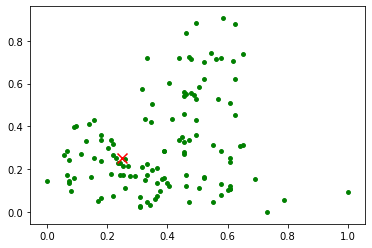

In [0]:
x=pd.DataFrame(basex)
y=basey

plt.scatter(x.iloc[:, 0],x.iloc[:, 1],c='green',s=15)
plt.scatter(0.25,0.25,c='red',marker='x',s=100)

In [0]:
accuracy(basex,basey,xtest,ytest)

'Accuracy:88.88888888888889%'